In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
%pylab inline
import requests, re
import pandas as pd
import seaborn as sns
import nltk

import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [86]:
#df1_filtered.to_csv('16_Nov_cleaned_eng_preprocessed_imp.csv', index=False)


In [4]:
df2= pd.read_csv('16_Nov_cleaned_eng_preprocessed_imp.csv')
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365837 entries, 0 to 365836
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_id             365837 non-null  object 
 1   user_id               365837 non-null  object 
 2   business_id           365837 non-null  object 
 3   stars                 365837 non-null  float64
 4   useful                365837 non-null  int64  
 5   funny                 365837 non-null  int64  
 6   cool                  365837 non-null  int64  
 7   text                  365837 non-null  object 
 8   date                  365835 non-null  object 
 9   text_no_stop          365835 non-null  object 
 10  review_length         365837 non-null  int64  
 11  word_count            365837 non-null  int64  
 12  reviews_per_business  365837 non-null  int64  
 13  is_english            365837 non-null  bool   
 14  processed_text        365837 non-null  object 
dtype

In [5]:
# Define the valid star values
valid_stars = [1, 2, 3, 4, 5]

# Filter the DataFrame
df2 = df2[df2['stars'].isin(valid_stars)]



# Convert float64 columns to int64
int_columns = ['useful', 'funny', 'review_length', 'word_count', 'reviews_per_business']
for col in int_columns:
    df2[col] = df2[col].fillna(0).astype('int64')

# Convert 'cool' from object to int64
# Ensure that 'cool' contains only numeric values or NaN
df2['cool'] = pd.to_numeric(df2['cool'], errors='coerce').fillna(0).astype('int64')

# Convert 'date' from object to datetime64[ns]
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')

# Convert 'is_english' from object to bool
# Assuming 'is_english' contains values that can be interpreted as boolean
df2['is_english'] = df2['is_english'].astype('bool')

# Check the updated DataFrame info
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365837 entries, 0 to 365836
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   review_id             365837 non-null  object        
 1   user_id               365837 non-null  object        
 2   business_id           365837 non-null  object        
 3   stars                 365837 non-null  float64       
 4   useful                365837 non-null  int64         
 5   funny                 365837 non-null  int64         
 6   cool                  365837 non-null  int64         
 7   text                  365837 non-null  object        
 8   date                  365835 non-null  datetime64[ns]
 9   text_no_stop          365835 non-null  object        
 10  review_length         365837 non-null  int64         
 11  word_count            365837 non-null  int64         
 12  reviews_per_business  365837 non-null  int64         
 13 

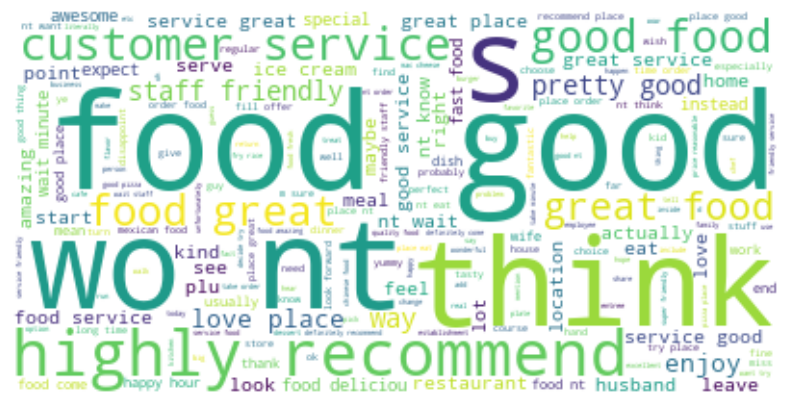

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df1['processed_text'] contains your preprocessed text data
long_string = ','.join(list(df2['processed_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# doing stratified sampling extracting 3,000 rows which 

In [11]:
import pandas as pd
import numpy as np

# Assuming df2 is your DataFrame

# Define the stratification strategy
def stratified_sample(df, col, n_samples):
    n = min(n_samples, df[col].nunique())
    return df.groupby(col, group_keys=False).apply(lambda x: x.sample(int(np.rint(n_samples * len(x) / len(df))))).sample(frac=1).reset_index(drop=True)

# Multi-feature stratification
sample_size = 2700  # Adjusted for the final total of 3000
stratified_samples = []
for col in ['stars', 'business_id']:  # Add other columns as necessary
    stratified_samples.append(stratified_sample(df2, col, sample_size // 2))

# Combine stratified samples
combined_stratified_sample = pd.concat(stratified_samples).drop_duplicates().reset_index(drop=True)

# Random sampling for the remaining
remaining_size = 3000 - combined_stratified_sample.shape[0]
random_sample = df2.sample(n=remaining_size)

# Final sample
final_sample = pd.concat([combined_stratified_sample, random_sample]).sample(frac=1).reset_index(drop=True)

# Check the final sample info
print(final_sample.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   review_id             3000 non-null   object        
 1   user_id               3000 non-null   object        
 2   business_id           3000 non-null   object        
 3   stars                 3000 non-null   float64       
 4   useful                3000 non-null   int64         
 5   funny                 3000 non-null   int64         
 6   cool                  3000 non-null   int64         
 7   text                  3000 non-null   object        
 8   date                  3000 non-null   datetime64[ns]
 9   text_no_stop          3000 non-null   object        
 10  review_length         3000 non-null   int64         
 11  word_count            3000 non-null   int64         
 12  reviews_per_business  3000 non-null   int64         
 13  is_english        

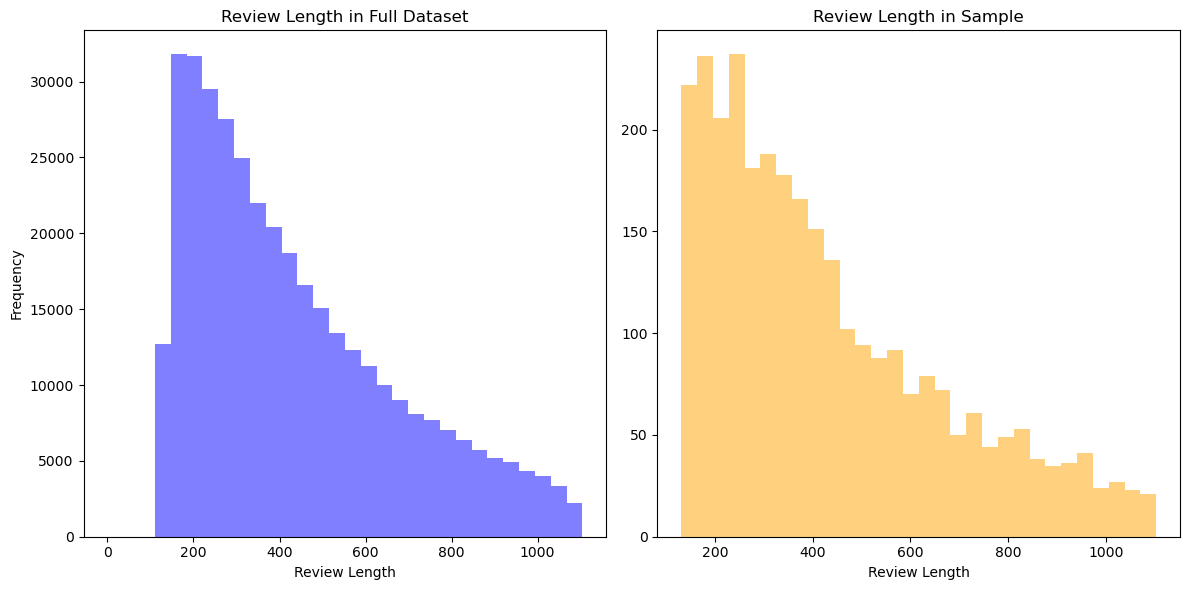

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df2['review_length'], bins=30, color='blue', alpha=0.5)
plt.title('Review Length in Full Dataset')
plt.xlabel('Review Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(final_sample['review_length'], bins=30, color='orange', alpha=0.5)
plt.title('Review Length in Sample')
plt.xlabel('Review Length')

plt.tight_layout()
plt.show()

In [14]:
import matplotlib.pyplot as plt

# Assuming df2 is your full dataset and final_sample is your sampled data

# Distribution of 'stars' in the full dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df2['stars'].value_counts(normalize=True).sort_index().plot(kind='bar', color='blue', alpha=0.5)
plt.title('Stars Distribution in Full Dataset')
plt.xlabel('Stars Rating')
plt.ylabel('Proportion')

# Distribution of 'stars' in the sample
plt.subplot(1, 2, 2)
final_sample['stars'].value_counts(normalize=True).sort_index().plot(kind='bar', color='orange', alpha=0.5)
plt.title('Stars Distribution in Sample')
plt.xlabel('Stars Rating')

plt.tight_layout()
plt.show()


In [34]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Add new stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Convert to list
data = final_sample['processed_text'].values.tolist()

# Tokenize and remove stop words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

# Create Dictionary and Corpus needed for Topic Modeling
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]


[nltk_data] Downloading package stopwords to /Users/ankur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from gensim.models import LdaMulticore

# Number of topics
num_topics = 10

# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# View the topics in LDA model
from pprint import pprint
pprint(lda_model.print_topics())


[(0,
  '0.019*"place" + 0.019*"good" + 0.016*"food" + 0.014*"nt" + 0.013*"great" + '
  '0.011*"service" + 0.009*"try" + 0.009*"time" + 0.007*"order" + '
  '0.007*"definitely"'),
 (1,
  '0.020*"good" + 0.019*"food" + 0.016*"place" + 0.013*"nt" + 0.011*"order" + '
  '0.011*"come" + 0.011*"great" + 0.010*"service" + 0.009*"like" + '
  '0.008*"friendly"'),
 (2,
  '0.020*"food" + 0.020*"place" + 0.017*"good" + 0.010*"great" + 0.010*"order" '
  '+ 0.010*"time" + 0.008*"try" + 0.008*"nt" + 0.007*"eat" + 0.006*"service"'),
 (3,
  '0.021*"great" + 0.016*"nt" + 0.016*"food" + 0.014*"order" + 0.010*"good" + '
  '0.010*"time" + 0.009*"get" + 0.009*"love" + 0.009*"pizza" + 0.008*"like"'),
 (4,
  '0.023*"food" + 0.020*"good" + 0.016*"great" + 0.012*"nt" + 0.010*"place" + '
  '0.010*"like" + 0.009*"time" + 0.008*"restaurant" + 0.008*"order" + '
  '0.007*"chicken"'),
 (5,
  '0.021*"good" + 0.018*"nt" + 0.011*"place" + 0.011*"time" + 0.010*"like" + '
  '0.010*"food" + 0.008*"order" + 0.007*"go" + 0.007

Topic 0: General experience (mentions of "place", "good", "food", "service").

Topic 1: Quality of food and service ("good", "food", "service", "friendly").

Topic 2: Overall dining experience ("food", "place", "good", "great").

Topic 3: Enjoyment and specific dishes ("great", "love", "pizza").

Topic 4: Restaurant ambiance and food quality ("food", "restaurant", "chicken").

Topic 5: Casual dining experience ("good", "pizza", "go").

Topic 6: Service and dining experience ("service", "order", "go").

Topic 7: Specific dishes and service ("roll", "order", "service").

Topic 8: Ordering process and food quality ("order", "food", "chicken").

Topic 9: General satisfaction and service ("like", "come", "service").

In [36]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=6)


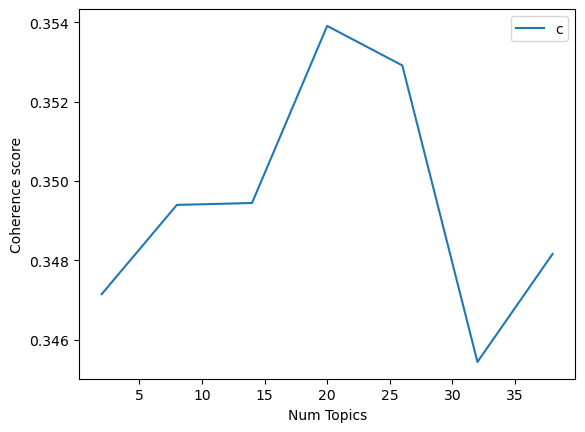

In [37]:
import matplotlib.pyplot as plt

# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [29]:
import warnings
warnings.filterwarnings('ignore')


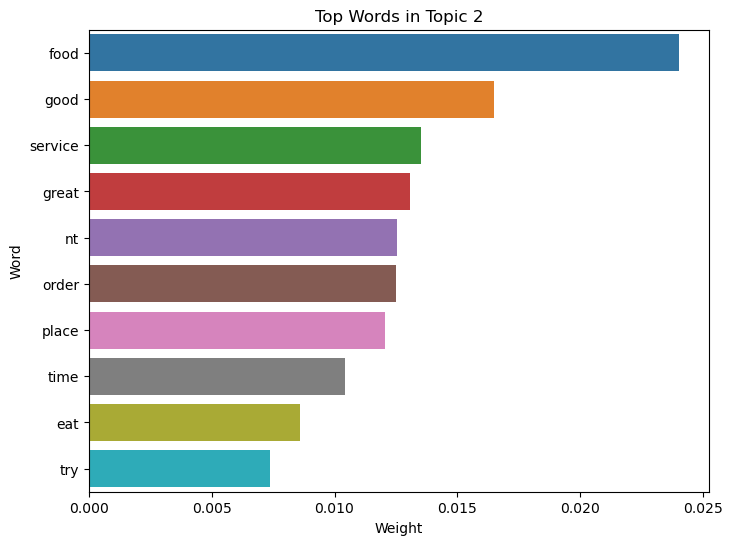

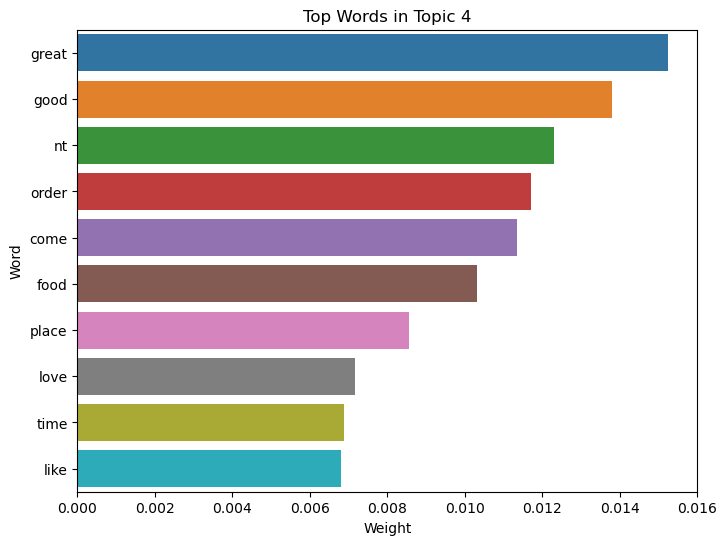

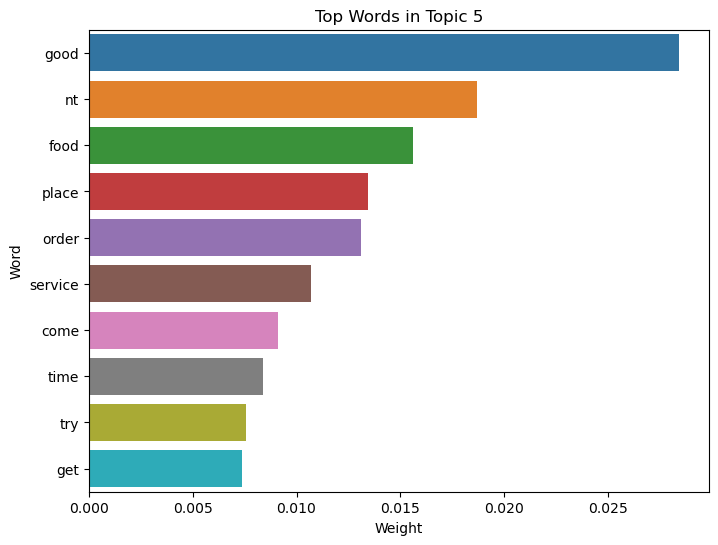

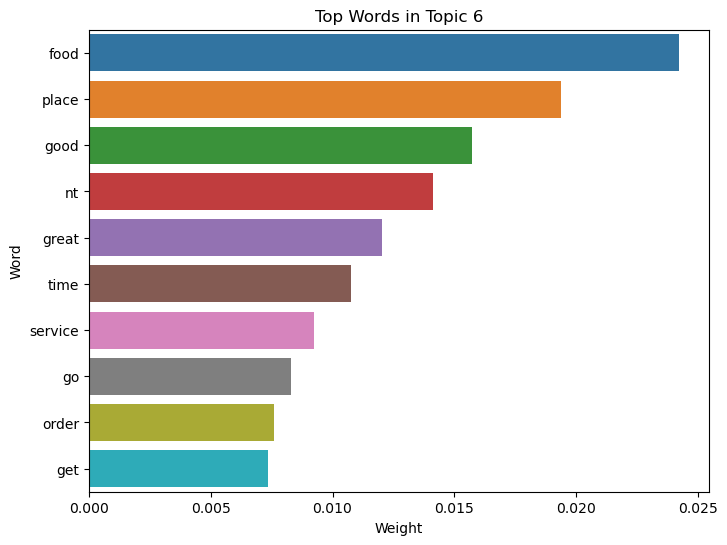

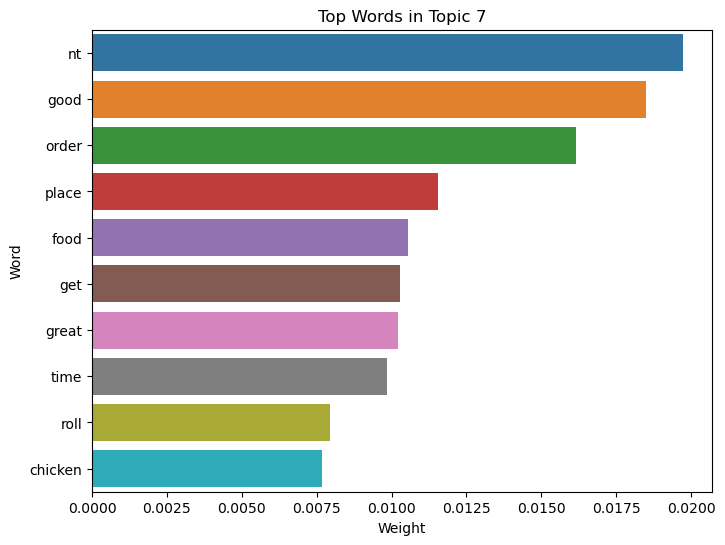

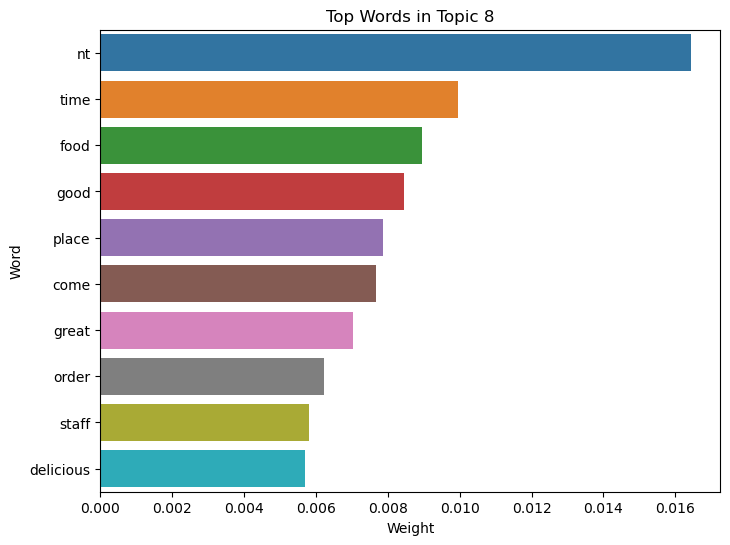

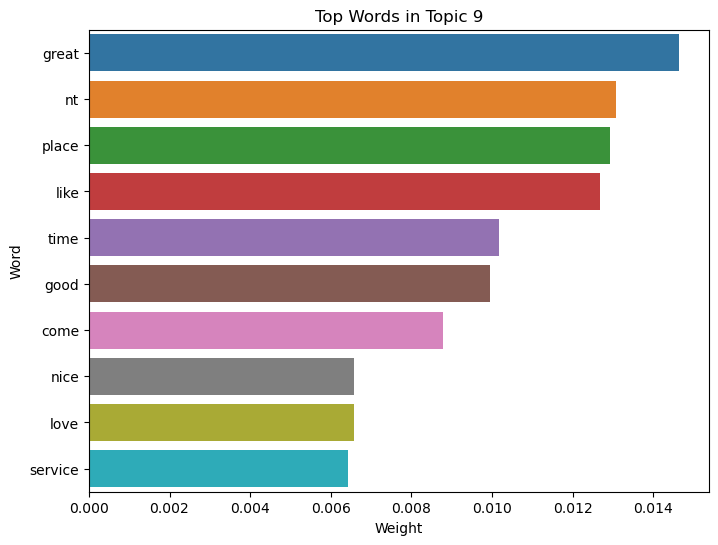

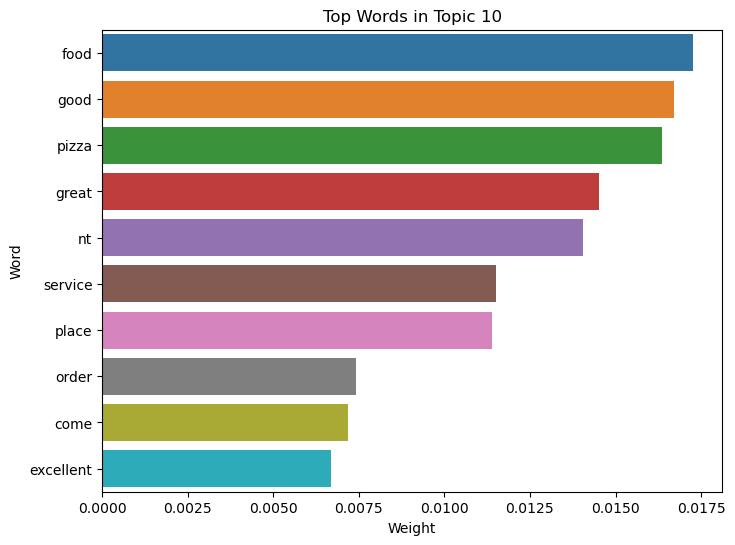

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(lda_model, num_topics, num_words, id2word):
    for i in range(num_topics):
        plt.figure(figsize=(8, 6))
        topic = lda_model.show_topic(i, num_words)
        topic_words = [word for word, _ in topic]
        topic_word_weights = [weight for _, weight in topic]
        sns.barplot(x=topic_word_weights, y=topic_words)
        plt.title(f'Top Words in Topic {i+1}')
        plt.xlabel('Weight')
        plt.ylabel('Word')
        plt.show()

plot_top_words(lda_model, num_topics=10, num_words=10, id2word=id2word)


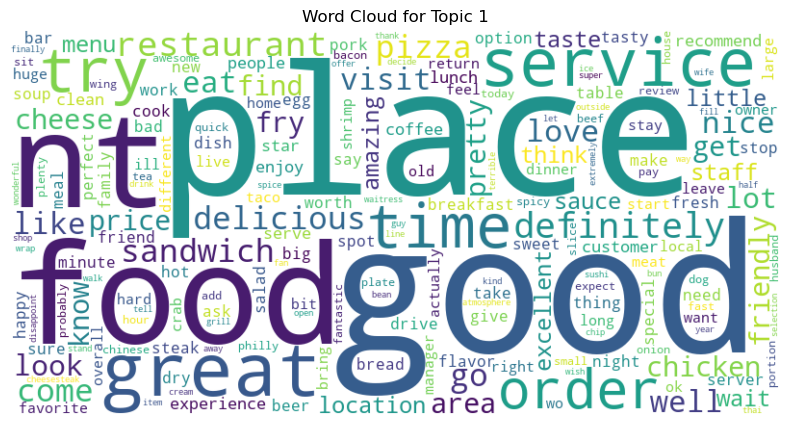

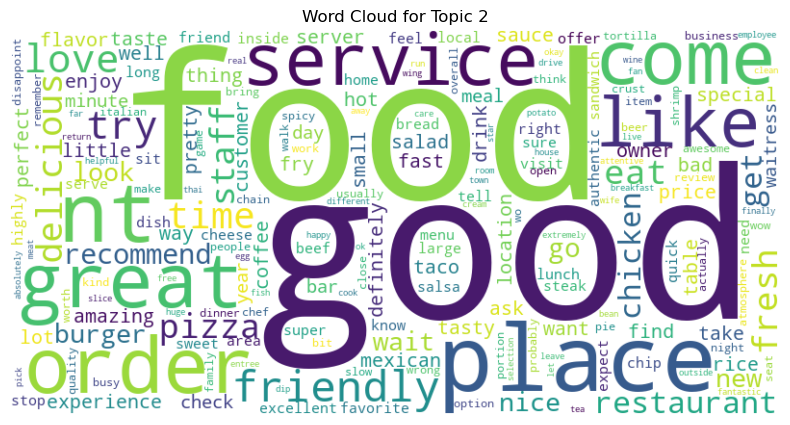

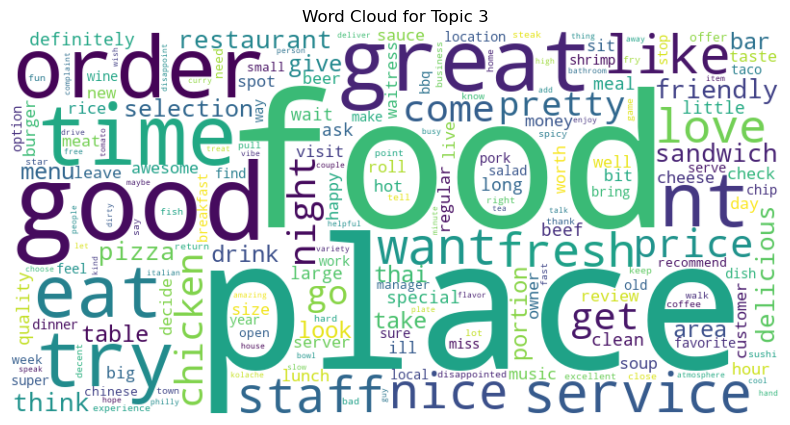

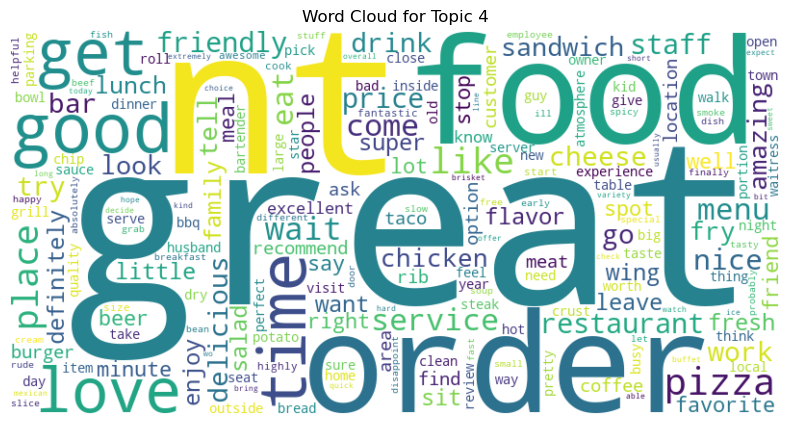

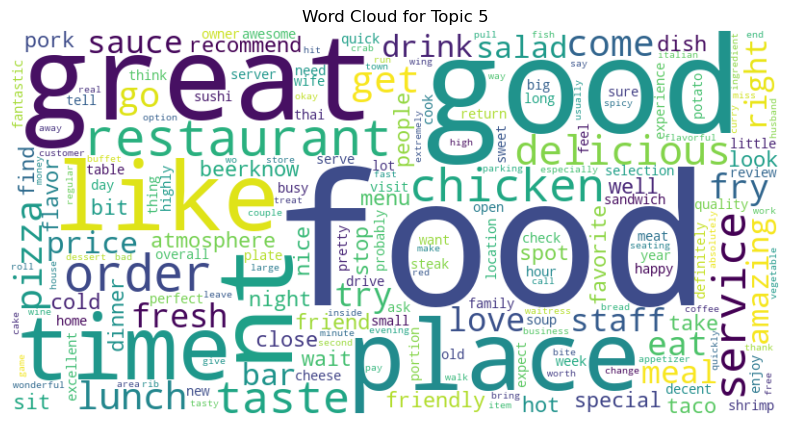

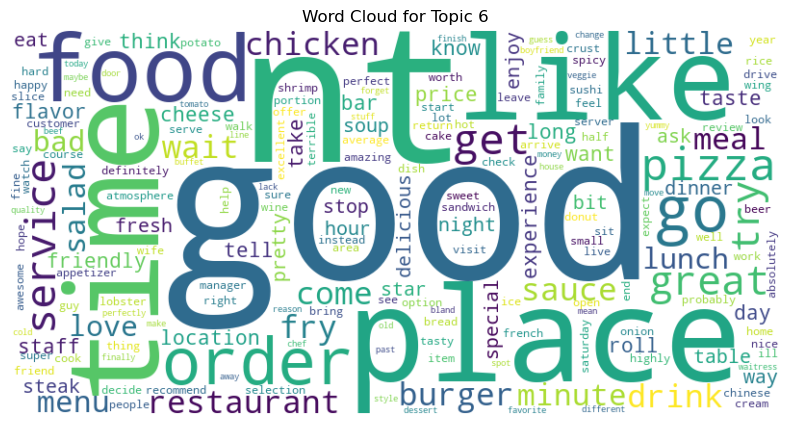

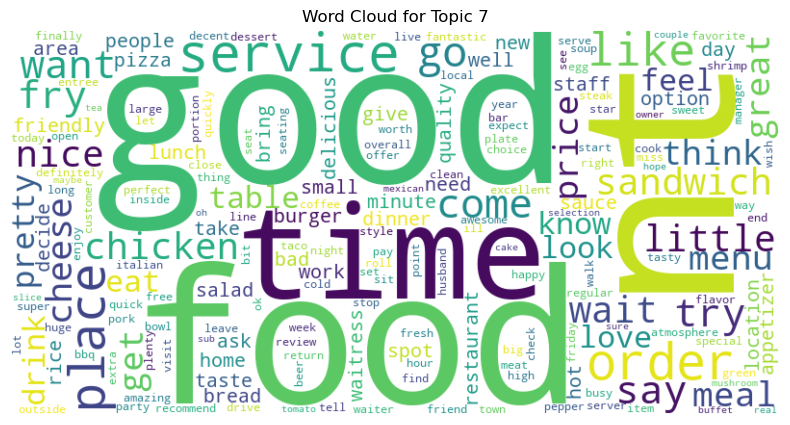

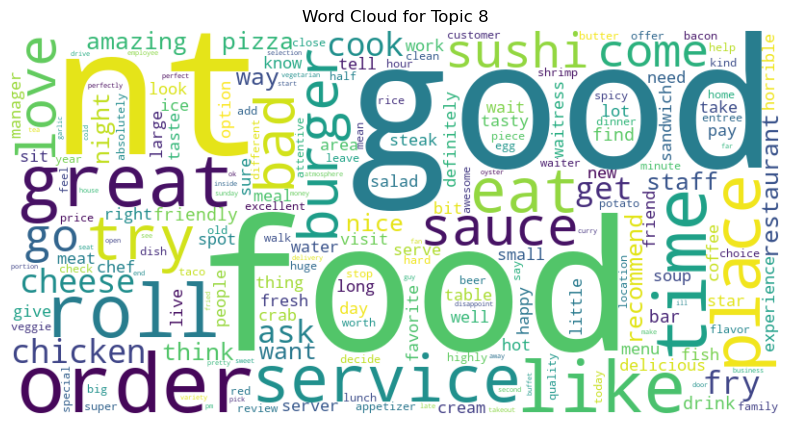

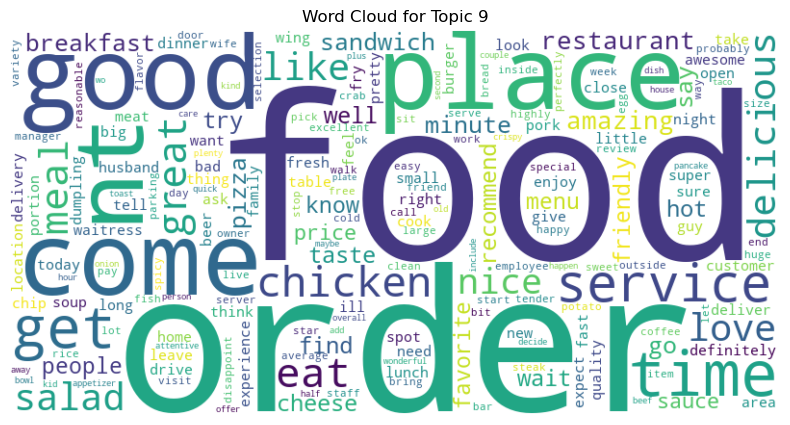

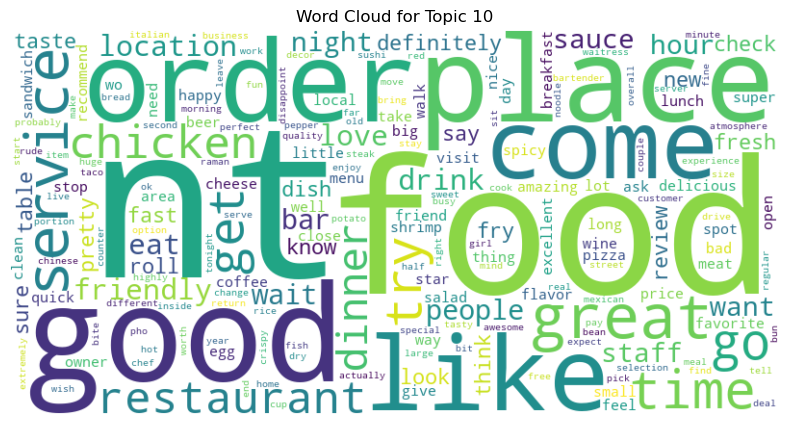

In [38]:
from wordcloud import WordCloud

def plot_word_cloud(lda_model, num_topics, id2word):
    for t in range(num_topics):
        plt.figure(figsize=(10, 5))
        wc = WordCloud(background_color="white", width=800, height=400)
        word_freq = dict(lda_model.show_topic(t, 200))
        wordcloud = wc.generate_from_frequencies(word_freq)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for Topic {t+1}')
        plt.show()

plot_word_cloud(lda_model, num_topics=10, id2word=id2word)


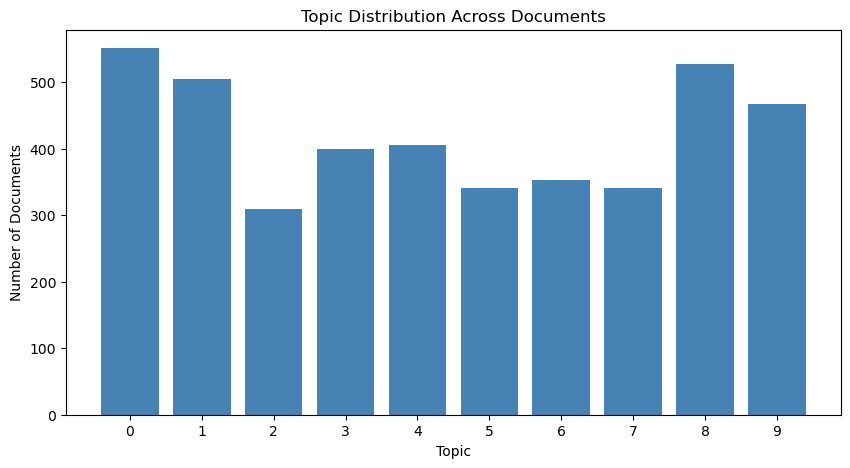

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_topic_distribution(lda_model, corpus):
    # Get the total number of topics
    num_topics = lda_model.num_topics

    # Initialize an array to store the topic counts
    topic_counts = np.zeros(num_topics)

    # Loop over each document and update the topic counts
    for _, row_list in enumerate(lda_model[corpus]):
        for topic, weight in row_list:
            if topic < num_topics:  # Check if the topic index is within the range
                topic_counts[topic] += 1

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(range(num_topics), topic_counts, color='steelblue')
    plt.xlabel('Topic')
    plt.ylabel('Number of Documents')
    plt.title('Topic Distribution Across Documents')
    plt.xticks(range(num_topics))
    plt.show()

# Call the function with your LDA model and corpus
plot_topic_distribution(lda_model, corpus)
